## Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Historical Product Demand.csv")
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [ ]:
data.rename(columns = {'Product_Code': 'ProductCode',
                       'Product_Category': 'ProductCategory', 
                       'Order_Demand': 'OrderDemand'}, inplace = True)
data.head()

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
data.isnull().sum()

ProductCode            0
Warehouse              0
ProductCategory        0
Date               11239
OrderDemand            0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

ProductCode        0
Warehouse          0
ProductCategory    0
Date               0
OrderDemand        0
dtype: int64

In [ ]:
data.sort_values('Date', ignore_index=True, inplace=True)
data.head()

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
0,Product_0965,Whse_A,Category_006,2011/1/8,2
1,Product_0412,Whse_S,Category_007,2011/10/20,(2)
2,Product_0125,Whse_S,Category_011,2011/10/20,(2)
3,Product_0642,Whse_C,Category_019,2011/10/31,3
4,Product_2137,Whse_S,Category_009,2011/11/18,(25)


In [ ]:
data['OrderDemand'] = data['OrderDemand'].str.replace('(',"")
data['OrderDemand'] = data['OrderDemand'].str.replace(')',"")
data['OrderDemand'] = data['OrderDemand'].astype('int64')

In [ ]:
from datetime import datetime as dt

data['Date']= pd.to_datetime(data['Date'])
data['Year'] = data["Date"].dt.year
data['Month'] = data["Date"].dt.month
data['Day'] = data["Date"].dt.day

## Exploratory Data Analysis and Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037336 entries, 0 to 1037335
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ProductCode      1037336 non-null  object        
 1   Warehouse        1037336 non-null  object        
 2   ProductCategory  1037336 non-null  object        
 3   Date             1037336 non-null  datetime64[ns]
 4   OrderDemand      1037336 non-null  int64         
 5   Year             1037336 non-null  int64         
 6   Month            1037336 non-null  int64         
 7   Day              1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 63.3+ MB


In [ ]:
data["OrderDemand"].describe()

count    1.037336e+06
mean     4.949384e+03
std      2.907344e+04
min      0.000000e+00
25%      2.000000e+01
50%      3.000000e+02
75%      2.000000e+03
max      4.000000e+06
Name: OrderDemand, dtype: float64

In [ ]:
data[["ProductCode", "Warehouse", "ProductCategory"]].describe()

,ProductCode,Warehouse,ProductCategory
count,1037336,1037336,1037336
unique,2160,4,33
top,Product_1359,Whse_J,Category_019
freq,16936,764447,470266


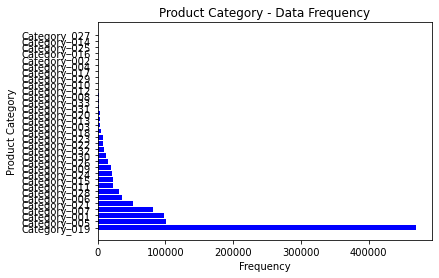

Number of ProductCategory 
Category_019    470266
Category_005    101627
Category_001     97787
Category_007     82402
Category_021     52008
Category_006     35552
Category_028     31012
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14771
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2268
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: ProductCategory, dtype: int64


In [ ]:
plt.figure()
plt.barh(data["ProductCategory"].value_counts().index, data["ProductCategory"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Product Category")
plt.title("Product Category - Data Frequency")
plt.show()
print(f"Number of ProductCategory \n{data['ProductCategory'].value_counts()}")

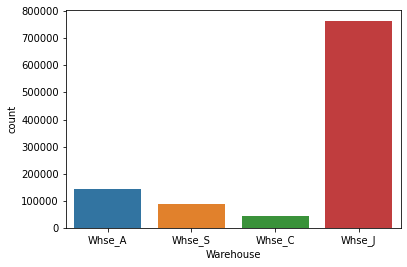

Number of samples according to Warehouse 
Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64


In [ ]:
sns.countplot(x="Warehouse", data=data)
plt.xticks(rotation = 0)
plt.show()
print(f"Number of samples according to Warehouse \n{data['Warehouse'].value_counts()}")

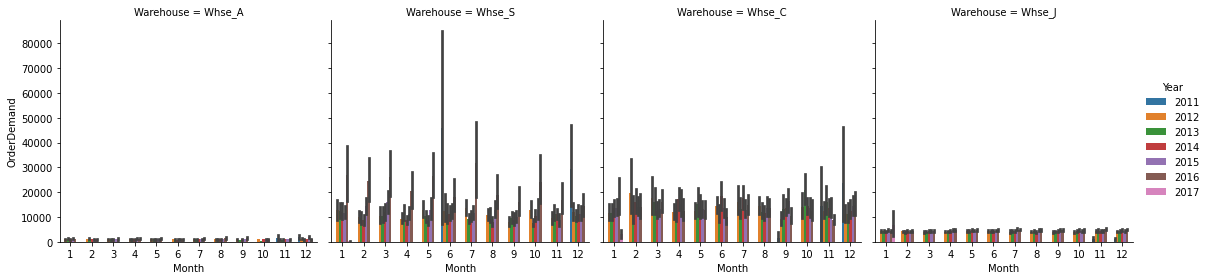

In [ ]:
sns.catplot(x="Month", y="OrderDemand",  hue="Year", col="Warehouse",
            data=data, kind="bar", height=4)
plt.show()

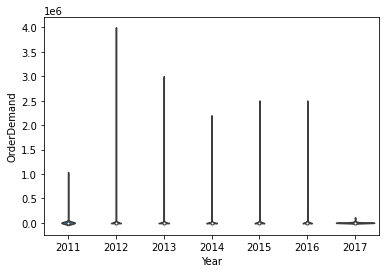

In [ ]:
sns.violinplot(x="Year", y="OrderDemand", data=data)
plt.show()

#### Yearly Analysis

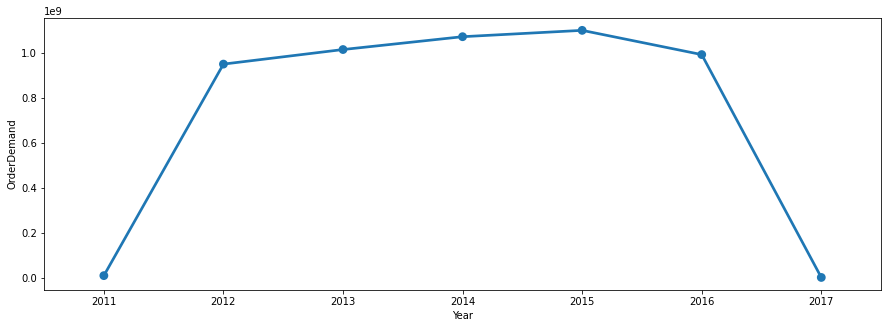

In [ ]:
df = data[['OrderDemand', 'Year']].groupby(["Year"]).sum().reset_index().sort_values(by='Year', ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Year', y='OrderDemand', data=df)
plt.show()

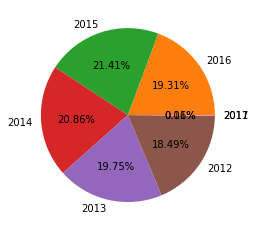

In [ ]:
plt.pie(df['OrderDemand'], labels=df['Year'].unique(), autopct='%1.2f%%')
plt.show() 

#### Monthly Analysis

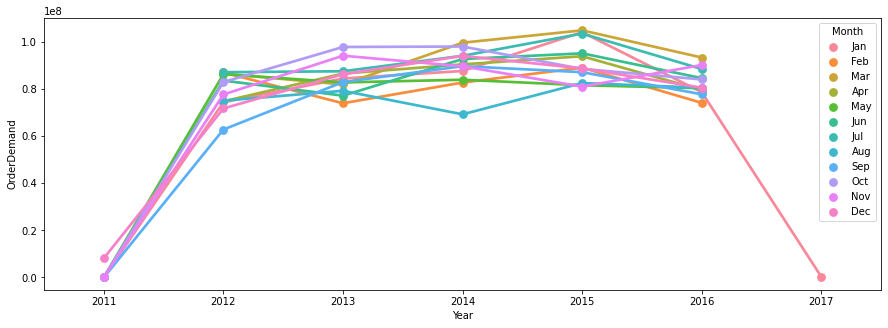

In [ ]:
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[['OrderDemand',
                'Month', 'Year',]].groupby(["Year",
                                            "Month"]).sum().reset_index().sort_values(by=['Year',
                                                                                          'Month'], ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Year', y='OrderDemand', data=df, hue='Month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                          'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
df = (df.pivot(index='Year', columns='Month', values='OrderDemand'))
df = df.loc[:, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
df

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,2.0,NaN,NaN,NaN,108.0,92000.0,NaN,NaN,6728.0,7.0,86524.0,8178525.0
2012,74331037.0,86951780.0,86463212.0,74714053.0,86246051.0,83521679.0,87071567.0,75003241.0,62748329.0,82891675.0,77618687.0,71698680.0
2013,84399001.0,73899741.0,81857480.0,86489453.0,82735797.0,77115902.0,87469057.0,79181220.0,82882856.0,97773582.0,94072859.0,86210974.0
2014,87593983.0,82688430.0,99580627.0,90391888.0,83876775.0,92655892.0,94023350.0,69199733.0,89629088.0,97963491.0,89572680.0,94002430.0
2015,104028474.0,88991822.0,104825197.0,93842250.0,81540033.0,95074257.0,103449803.0,82468895.0,87080162.0,88477211.0,80944042.0,88676245.0
2016,78627619.0,74065041.0,93303910.0,79503364.0,80299593.0,84553011.0,88439936.0,80471772.0,77698896.0,84000757.0,90128568.0,80497932.0
2017,294967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


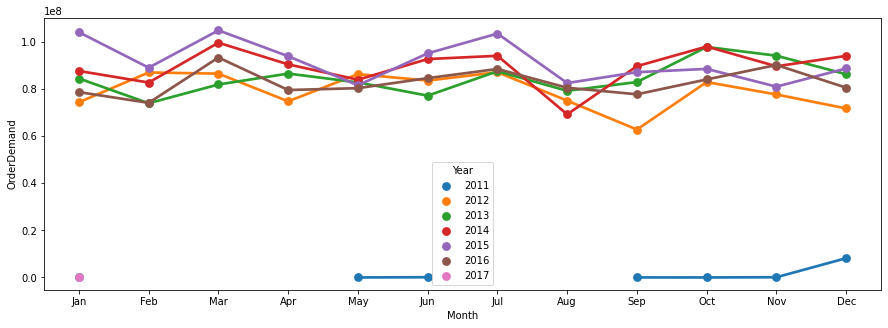

In [ ]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[["OrderDemand", 'Month', 'Year']].groupby(["Year",
                                                  "Month"]).sum().reset_index().sort_values(by=['Year', 
                                                                                                 'Month'], ascending=True)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="OrderDemand", data=df, hue="Year")
plt.show()

In [ ]:
df.describe()

,Year,OrderDemand
count,68.000000,6.800000e+01
mean,2013.735294,7.550256e+07
std,1.671693,2.852781e+07
min,2011.000000,2.000000e+00
25%,2012.000000,7.749299e+07
50%,2014.000000,8.369923e+07
75%,2015.000000,8.913704e+07
max,2017.000000,1.048252e+08


#### Warehouse Based Analysis

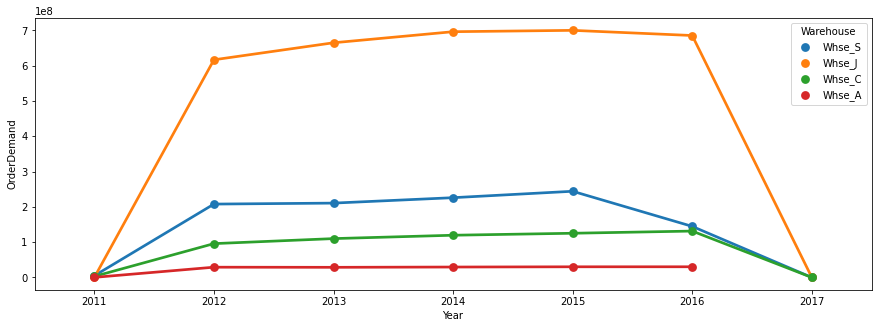

In [ ]:
df = data[["OrderDemand", 'Year', 'Warehouse']].groupby(["Year",
                                                         "Warehouse"]).sum().reset_index().sort_values(by=['Warehouse','Year'], ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Year', y="OrderDemand", data=df, hue="Warehouse")
plt.show()

In [ ]:
df = (df.pivot(index='Year', columns='Warehouse', values='OrderDemand'))
df

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
Year,,,,
2011,230881.0,3031847.0,198547.0,4902619.0
2012,29048000.0,95823181.0,616560449.0,207828361.0
2013,28696890.0,110035879.0,664781670.0,210573483.0
2014,29507380.0,119583036.0,696130811.0,225957140.0
2015,30167990.0,125188986.0,699932604.0,244108811.0
2016,30226290.0,131373097.0,685336996.0,144654016.0
2017,NaN,35378.0,259319.0,270.0


In [ ]:
df.describe()

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
count,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2.464624e+07,8.358163e+07,4.804572e+08,1.482892e+08
std,1.197623e+07,5.719735e+07,3.292411e+08,1.042437e+08
min,2.308810e+05,3.537800e+04,1.985470e+05,2.700000e+02
25%,2.878467e+07,4.942751e+07,3.084099e+08,7.477832e+07
50%,2.927769e+07,1.100359e+08,6.647817e+08,2.078284e+08
75%,3.000284e+07,1.223860e+08,6.907339e+08,2.182653e+08
max,3.022629e+07,1.313731e+08,6.999326e+08,2.441088e+08


#### Product Category Based Analysis

In [ ]:
df = data[["OrderDemand",
           'ProductCategory', 'Warehouse']].groupby(["ProductCategory",
                                                     "Warehouse"]).sum().reset_index().sort_values(by=['OrderDemand'],
                                                                                                   ascending=False)
df = df.pivot(index='ProductCategory', columns='Warehouse', values='OrderDemand')
df

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
ProductCategory,,,,
Category_001,1749.0,60106.0,1.623054e+06,72564.0
Category_002,NaN,NaN,NaN,628.0
Category_003,131607.0,NaN,3.926700e+04,222076.0
Category_004,NaN,NaN,NaN,99046.0
Category_005,1124300.0,12528700.0,1.289245e+08,57097050.0
Category_006,11613427.0,33131500.0,3.187667e+08,42059693.0
Category_007,2839680.0,7179524.0,1.121572e+08,6515085.0
Category_008,1903.0,317.0,1.534800e+04,NaN
Category_009,920903.0,251031.0,4.464690e+05,2163738.0


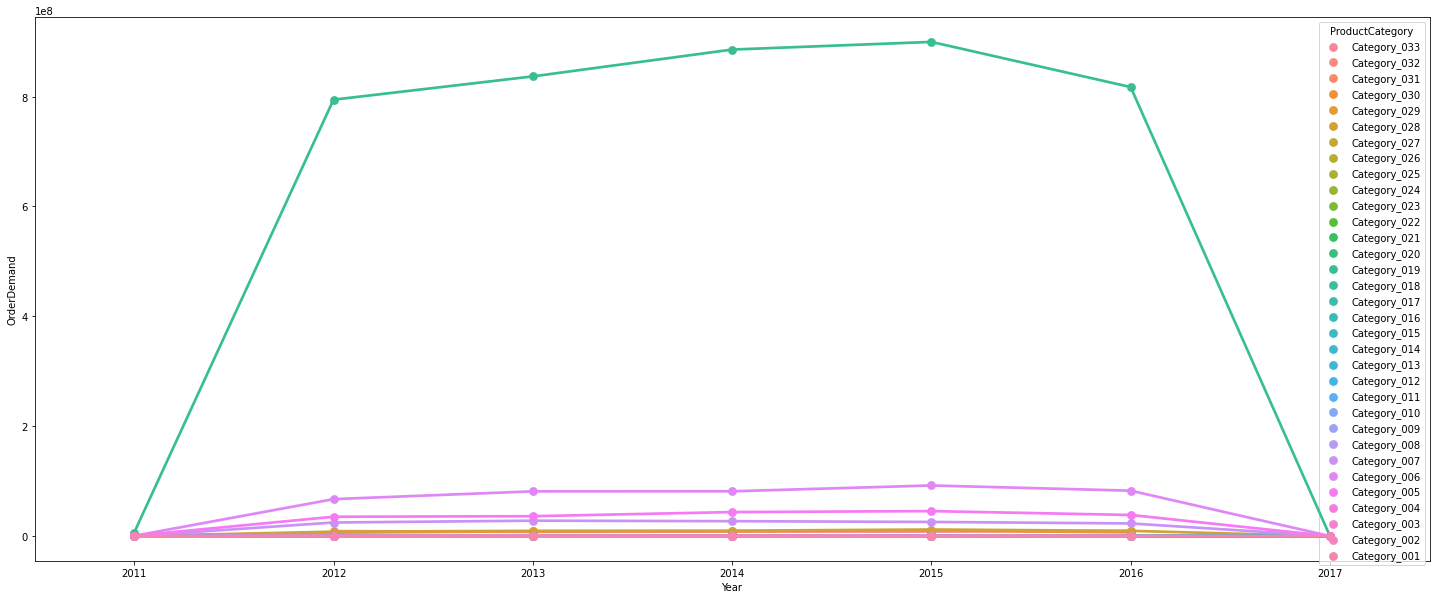

In [ ]:
df = data[["OrderDemand", 'Year', 'ProductCategory']].groupby(["Year",
                                                         "ProductCategory"]).sum().reset_index().sort_values(by=['ProductCategory','Year'], ascending=False)
f, ax=plt.subplots(figsize=(25,10))
sns.pointplot(x='Year', y="OrderDemand", data=df, hue="ProductCategory")
plt.show()

## Forecast the Order Demand with LSTM Model

In [ ]:
df = data[(data['Date']>='2012-01-01') & (data['Date']<='2017-12-31')].sort_values('Date', ascending=True)
df = df.groupby('Date')['OrderDemand'].sum().reset_index()
df

,Date,OrderDemand
0,2012-01-01,2
1,2012-01-02,680277
2,2012-01-03,1645257
3,2012-01-04,1295861
4,2012-01-05,8941774
...,...,...
1682,2017-01-03,2400
1683,2017-01-04,29250
1684,2017-01-05,83929
1685,2017-01-06,175140


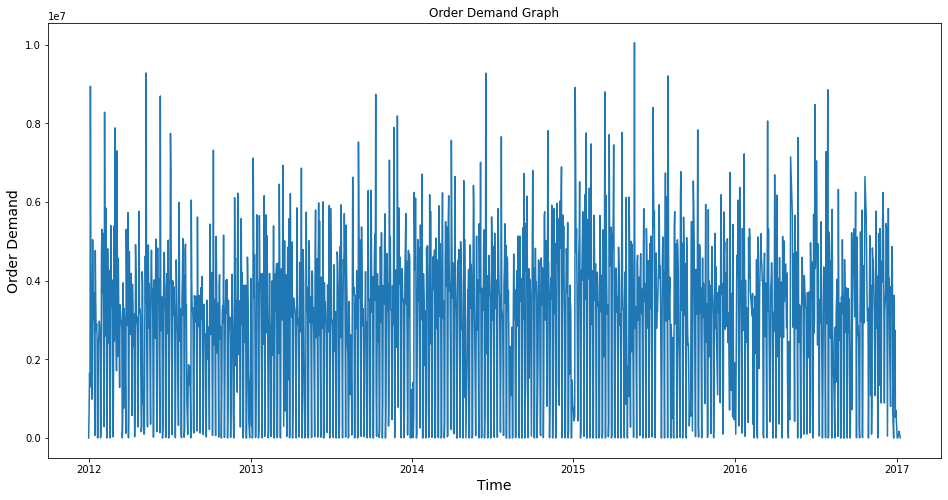

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("Order Demand Graph")
plt.plot(df["Date"], df["OrderDemand"])
plt.xlabel("Time", fontsize=14,)
plt.ylabel("Order Demand", fontsize=14)
plt.show()

In [ ]:
orderD = df.filter(["OrderDemand"])
orderD_array = orderD.values
train_close_len = math.ceil(len(orderD_array) * 0.8)
train_close_len

1350

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(orderD_array)
scaled_data

array([[1.99031453e-07],
       [6.76982600e-02],
       [1.63728946e-01],
       ...,
       [8.35225542e-03],
       [1.74291844e-02],
       [4.15776706e-04]])

In [ ]:
train_data = scaled_data[0 : train_close_len, :]
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)

[array([1.99031453e-07, 6.76982600e-02, 1.63728946e-01, 1.28958549e-01,
       8.89847137e-01, 4.36947184e-01, 9.82368500e-02, 1.43570443e-01,
       5.01388891e-01, 3.30568853e-01, 2.98325061e-01, 3.68113549e-01,
       6.39388544e-03, 4.74326585e-01, 3.44696702e-01, 2.69870529e-01,
       2.89035666e-01, 2.55127374e-01, 1.99031453e-05, 1.34953277e-03,
       2.51593073e-01, 2.53474816e-01, 2.95791390e-01, 2.81800375e-01,
       2.26411613e-01, 6.16997505e-04, 2.32949398e-02, 4.68048834e-01,
       5.27871021e-01, 3.66383269e-01, 5.18157490e-01, 3.13818067e-01,
       2.88706070e-02, 8.24073013e-01, 4.73426465e-01, 2.58256546e-01,
       5.81354156e-01, 3.14602052e-01, 9.95157266e-05, 5.74927232e-02,
       4.78518585e-01, 2.40411486e-01, 3.48965828e-01, 4.24549316e-01,
       2.88825090e-01, 1.69176735e-04, 1.26577138e-01, 5.37255155e-01,
       3.60979068e-01, 3.33127004e-01, 3.99856478e-01, 1.72541561e-01,
       2.98547180e-03, 8.14840741e-02, 5.36301397e-01, 2.45390755e-01,
     

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1290, 60, 1)

In [ ]:
test_data = scaled_data[train_close_len - 60 : , :]
X_test = []
y_test = df.iloc[train_close_len : , :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60 : i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Build a LSTM Model

In [ ]:
model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))


model.add(LSTM(units=256, activation='relu', return_sequences=False))


model.add(Dense(units=1))

In [ ]:
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [ ]:
model.fit(X_train, y_train,
          epochs=3,
          batch_size=100, 
          verbose=1)

Epoch 1/3
13/13 [==============================] - 32s 2s/step - loss: 0.0767 - mae: 0.2304
Epoch 2/3
13/13 [==============================] - 26s 2s/step - loss: 0.0494 - mae: 0.1826
Epoch 3/3
13/13 [==============================] - 26s 2s/step - loss: 0.0414 - mae: 0.1666


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 3s 261ms/step


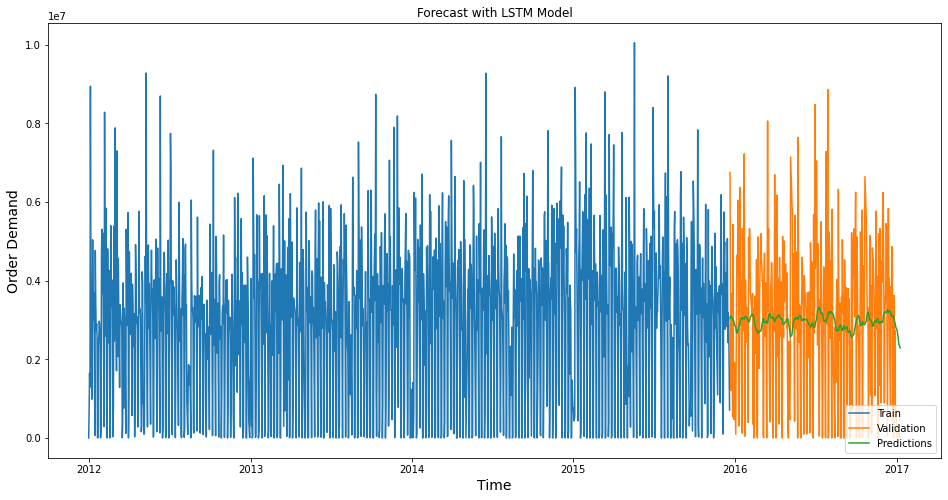

In [ ]:
train = orderD[:train_close_len]
valid = orderD[train_close_len:]
valid["Predictions"] = predictions
plt.figure(figsize=(16, 8))
plt.title("Forecast with LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Order Demand", fontsize=14)
plt.plot(df["Date"][:train_close_len], train["OrderDemand"])
plt.plot(df["Date"][train_close_len:], valid[["OrderDemand", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.show()

## Build a Optimized LSTM Model

In [ ]:
optimized_model = Sequential()

optimized_model.add(LSTM(512, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))

optimized_model.add(LSTM(256, activation='relu', return_sequences=False))

optimized_model.add(Dense(128))

optimized_model.add(Dense(64))

optimized_model.add(Dense(32))

optimized_model.add(Dense(1))

In [ ]:
optimized_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [ ]:
optimized_model.fit(X_train, y_train, 
          batch_size=32, 
          epochs=20, 
          verbose=1)

Epoch 1/20
41/41 [==============================] - 48s 1s/step - loss: 0.0464 - mae: 0.1760
Epoch 2/20
41/41 [==============================] - 49s 1s/step - loss: 0.0415 - mae: 0.1651
Epoch 3/20
41/41 [==============================] - 46s 1s/step - loss: 0.0405 - mae: 0.1625
Epoch 4/20
41/41 [==============================] - 44s 1s/step - loss: 0.0402 - mae: 0.1620
Epoch 5/20
41/41 [==============================] - 43s 1s/step - loss: 0.0400 - mae: 0.1616
Epoch 6/20
41/41 [==============================] - 45s 1s/step - loss: 0.0398 - mae: 0.1622
Epoch 7/20
41/41 [==============================] - 45s 1s/step - loss: 0.0390 - mae: 0.1591
Epoch 8/20
41/41 [==============================] - 45s 1s/step - loss: 0.0372 - mae: 0.1569
Epoch 9/20
41/41 [==============================] - 45s 1s/step - loss: 0.0372 - mae: 0.1558
Epoch 10/20
41/41 [==============================] - 45s 1s/step - loss: 0.0359 - mae: 0.1529
Epoch 11/20
41/41 [==============================] - 47s 1s/step - lo

In [ ]:
o_predictions = optimized_model.predict(X_test)
o_predictions = scaler.inverse_transform(o_predictions)

11/11 [==============================] - 3s 210ms/step


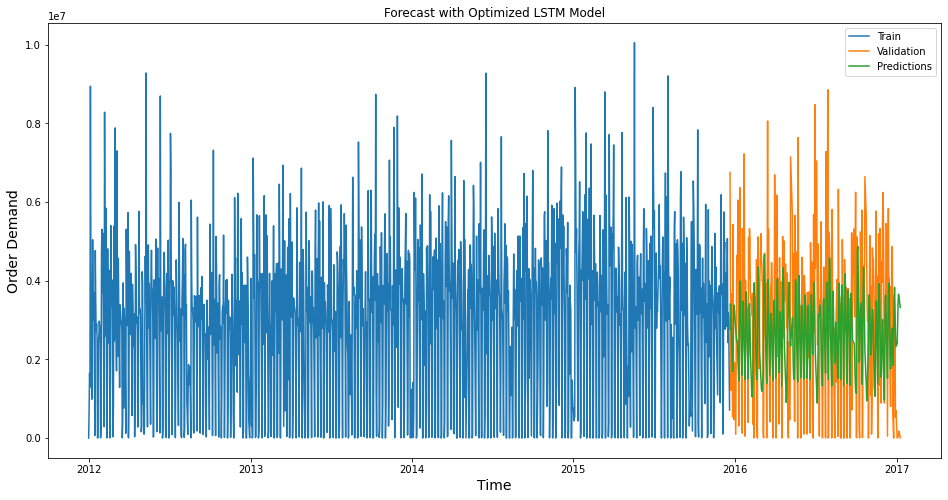

In [ ]:
train = orderD[:train_close_len]
valid = orderD[train_close_len:]
valid["Predictions"] = o_predictions
plt.figure(figsize=(16, 8))
plt.title("Forecast with Optimized LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Order Demand", fontsize=14)
plt.plot(df["Date"][:train_close_len], train["OrderDemand"])
plt.plot(df["Date"][train_close_len:], valid[["OrderDemand", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="upper right")
plt.show()